In [40]:
#%%writefile Rocket.py

import utils
import numpy as np
import math


class Rocket:

    def __init__(self, ID, origin, velocity, evalFunc, explodeParticles):
        #want these to be np.array type
        self.id = ID
        self.loc = np.array(origin)
        self.origin = origin
        self.velocity = velocity
        self.pbest = np.array(origin)
        self.evalFunc = evalFunc
        self.numParticles = explodeParticles
        self.pbestVal = self.evaluate()

        
    def printroc(self):
        print(self.id, self.loc, self.origin, self.velocity, self.pbest, self.evalFunc)

    def launch(self, num_steps, x, y, z):
        self.pbestVal = self.evaluate()
        for i in range(num_steps):
            val = self.evaluate()
            if val > self.pbestVal:
                self.pbestVal = val
                self.pbest = np.array(loc)


            if self.loc.size == 2:
                x.append(self.loc[0])
                y.append(self.loc[1])
                z.append(val)
            np.add(self.loc, self.velocity)

        return None

    def explode(self):
        #We want to spawn particles and have them do some sort of local search
        for i in range(self.numParticles):
            return None
            #create particle with random direction starting at pbest.
            #TODO

    def evaluate(self):
        if self.evalFunc == utils.Function.Sphere:
            return self.evaluateSphere()

        elif self.evalFunc == utils.Function.Ackley:
            return self.evaluateAckley()
            
        elif self.evalFunc == utils.Function.Rosenbrock:
            return self.evaluateRosenbrock()

        elif self.evalFunc == utils.Function.Rastrigin:
            return self.evaluateRastrigin()


    def evaluateSphere(self):
        return np.sum(self.loc * self.loc) #???

    def evaluateAckley(self):
        firstSum = 0
        secondSum = 0
        dimensions = self.loc.size
        for i in range(dimensions):
            firstSum += self.loc[i]*self.loc[i];
            secondSum += math.cos(2 * math.pi * self.loc[i]);
    
        #-20.0 * exp(-0.2*sqrt(firstSum / (double)dimensions)) - exp(secondSum / (double) dimensions) + 20 + M_E;
        return -20.0 * math.exp(-0.2* math.sqrt(firstSum/dimensions)) - math.exp(secondSum / dimensions) + 20 + math.e

    def evaluateRosenbrock(self):
        total = 0
        dimensions = self.loc.size
        for i in range(dimensions - 1): #Why - 1
            #total += 100*(pos[i+1] - pos[i]*pos[i])*(pos[i+1] - pos[i]*pos[i]) + (pos[i] - 1)*(pos[i] - 1);
            total += 100*(self.loc[i+1] - self.loc[i]*self.loc[i])*(self.loc[i+1] - self.loc[i]*self.loc[i]) + (self.loc[i] - 1)*(self.loc[i] - 1)
        return total

    def evaluateRastrigin(self):        
        dimensions = self.loc.size
        fitness = 10 * dimensions
        for i in range(dimensions):
            #fitness += pos[i]*pos[i] - (10 * cos(2 * M_PI * pos[i]));
            fitness += self.loc[i]*self.loc[i] - (10 * math.cos(2 * math.pi * self.loc[i]))
        return fitness


In [41]:
#%%writefile Swarm.py

import utils
import numpy as np
import Rocket
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


class Swarm(object):
    """docstring for Swarm"""
    def __init__(self, num_rockets, num_iterations, num_steps, algorithm, annealing, dimensions, explodeParticles, func, plot):
        super(Swarm, self).__init__()
        self.gbest = float("inf")
        self.num_rockets = num_rockets
        self.rockets = []
        self.num_iterations = num_iterations
        self.func = func
        self.algorithm = algorithm
        self.dimensions = dimensions
        self.explode = explodeParticles
        self.steps = num_steps
        self.plotref = plot
        self.X = []
        self.Y = []
        self.Z = []

    def run(self):
        print("RUNNING")
        o_min, o_max = utils.loc_min_max(self.algorithm)
        origin = np.random.uniform(o_min, o_max, self.dimensions)
        print("Origin = ", origin)
        
        if self.algorithm == 1:
            self.run_rotating(origin)
        else:
            self.run_recursive(origin, self.num_iterations)
            
        if self.dimensions == 2:    
            print(self.X)
            print(self.Y)
            print(self.Z)
            self.plot_and_anim()

    def run_rotating(self, origin):
        print("RUNNING ROTATING")
        for i in range(self.num_rockets):
            v_min, v_max = utils.vel_min_max(self.algorithm)
            velocity = np.random.uniform(v_min, v_max, self.dimensions)
            new_rocket = Rocket.Rocket(i, origin, velocity, self.func, self.explode)
            new_rocket.printroc()
            thiss = input("Hold")
            self.rockets.append(new_rocket)

        ###### LOCAL SEARCH?? #######

        for i in range(self.num_iterations):
            if i + 1 != self.num_iterations:
                self.rockets[i].launch(self.steps, self.X, self.Y, self.Z)
                self.rockets[i].velocity = np.subtract(self.rockets[i+1].pbest, self.rockets[i].pbest) * 0.1 #reduce velocity step size
                self.rockets[i].origin = self.rockets[i].pbest
            else:
                self.rockets[i].launch(self.steps, self.X, self.Y, self.Z )
                self.rockets[i].velocity = np.subtract(self.rockets[0].pbest, self.rockets[i].pbest) * 0.1 #reduce velocity step size
                self.rockets[i].origin = self.rockets[i].pbest



    def run_recursive(self, origin, iterations_left):

        for i in range(self.num_rockets):
            v_min, v_max = utils.vel_min_max(self.algorithm)
            velocity = np.random.uniform(v_min, v_max, self.dimensions)
            new_rocket = Rocket(origin, velocity, self.func, self.explode)
            self.rockets.append(new_rocket)

        ###### LOCAL SEARCH?? #######

        for i in range(self.num_iterations):
            self.rockets[i].launch(self.steps)
            self.rockets[i].velocity = np.subtract(rockets[i+1].pbest, self.rockets[i].pbest) * 0.1 #reduce velocity step size
            self.rockets[i].origin = self.rockets[i].pbest


    def plot_and_anim(self):

        fig, ax = plt.subplots()
        xdata, ydata = [], []
        ln, = plt.plot([], [], 'ro', animated=True)

        def init():
            ax.set_xlim(-10, 10)
            ax.set_ylim(-10, 10)
            return ln,

        def update(frame):
            xdata.append(self.X[frame])
            ydata.append(self.Y[frame])
            ln.set_data(xdata, ydata)
            return ln,

        ani = FuncAnimation(fig, update, frames=len(self.X),
                            init_func=init, blit=True)
        plt.show() 



In [42]:
#%%writefile utils.py


from enum import IntEnum

def loc_min_max(func):
    if func == 1: #sphere
        return 5.0,5.0
    elif func == 2: #ackley
        return 16.0,32.0
    elif func == 3: #rosebrock
        return 15.0,30.0
    elif func == 4: #ras
        return 2.56,5.12


def vel_min_max(func):
    if func == 1: #sphere
        return 5.0,5.0
    elif func == 2: #ackley
        return -2.0,4.0
    elif func == 3: #rosebrock
        return -2.0,2.0
    elif func == 4: #ras
        return -2.0,4.0

class Function(IntEnum):
    Sphere = 1
    Ackley = 2
    Rosenbrock = 3
    Rastrigin = 4
    

[5.0, 5.0, 5.0, 5.0, 5.0]
[5.0, 5.0, 5.0, 5.0, 5.0]
[50.0, 50.0, 50.0, 50.0, 50.0]


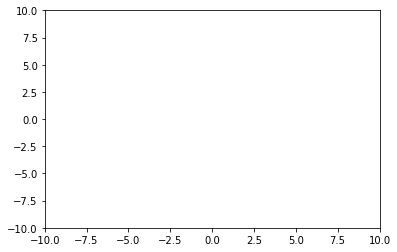

In [43]:
# %%writefile main.py

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import Swarm
import Rocket
import utils

## https://matplotlib.org/users/colormapnorms.html color normalization for plotting
## https://matplotlib.org/api/pyplot_summary.html color map stuff

## https://brushingupscience.com/2016/06/21/matplotlib-animations-the-easy-way/ good stuff for animations
"""
o_min, o_max = utils.loc_min_max(1)
origin = np.random.uniform(o_min, o_max, 2)
v_min, v_max = utils.vel_min_max(1)
velocity = np.random.uniform(v_min, v_max, 2)
rocket = Rocket.Rocket(origin, velocity, 1, 1)
"""

"""
create lists that we will pass through to eval, eval will update those lists with append https://stackoverflow.com/questions/986006/how-do-i-pass-a-variable-by-reference
then update will just pull the ith datapoint in using xdata.append(i)

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro', animated=True)

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show() 


"""
#(self, num_rockets, num_iterations, num_steps, algorithm, annealing, dimensions, explodeParticles, plot)

swarm = Swarm.Swarm(num_rockets=4, num_iterations=1, num_steps=5, algorithm=1, annealing=0, dimensions=2, explodeParticles=0, func=1, plot=1)
swarm.run()
